# A STUDY ON COVID-19 (CORONAVIRUS) CASES BY MUNICIPALITY IN THE NETHERLANDS  ON THE REALTIME RIVM.NL DATABASE         (6 April 2020)

In [1]:
#Importing the relevant libraries
from bs4 import BeautifulSoup
import requests
from lxml import html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## PART 1 - TOTAL NUMBERS OF CASES & DEATHS  VIA RIVM.NL / DATASET 1

In [0]:
# Scrapping the data via BS4
request_data1=requests.get('https://www.rivm.nl/coronavirus-kaart-van-nederland').text
soup1 = BeautifulSoup(request_data1,'html.parser')
#print(soup.prettify())

In [0]:
#Scrapping the table from the raw data
my_table1=soup1.find_all('table')

In [4]:
#Setting a dataframe
df1= pd.read_html(str(my_table1), index_col=False, header=None)[0]
df1.head(15)

,0,1,2
0,Positief geteste personen,29.214 *,(+1.061)
1,Ziekenhuisopnames,9.309,(+182)
2,Overleden personen,3.315**,(+181)


In [5]:
#Data Wrangling 
df1=df1.T
headers=["People tested positive", "Admitted to Hospital", "Death"]
df1.columns=headers
df1.drop(df1.index[0], inplace=True)
df1.head()

#While the numbers without parantheses shows the current total numbers, 
#the numbers between parantheses shows the daily increase per column. 


,People tested positive,Admitted to Hospital,Death
1,29.214 *,9.309,3.315**
2,(+1.061),(+182),(+181)


## PART 2 - THE NUMBERS OF CASES BY MUNICIPALITY VIA RIVM.NL / DATASET 2

#### SCRAPING AND SAVING THE DATA AS CSV

In [0]:
#Scraping dataset via request
request_data=requests.get('https://www.rivm.nl/coronavirus-kaart-van-nederland').text
soup = BeautifulSoup(request_data,'html.parser')
my_table=soup.find_all('div', {'id':"csvData"})
table=str(my_table[0]).split('\n')

#### DATA WRANGLING

In [7]:
#Setting it to a dataframe 
df2 = pd.DataFrame([sub.split(";") for sub in table ])
#Cleaning the data 
df2.drop(0,0,inplace=True)
df2.drop(1,0,inplace=True)
df2.drop(df2.tail(1).index,0,inplace=True)
df2.drop([0,6,7,8], 1, inplace=True)
headers=["Municipality","People_tested_positive","Hospitalized_Case_Number","Death","Population"]
df2.columns=headers


df2.head()

,Municipality,People_tested_positive,Hospitalized_Case_Number,Death,Population
2,'s-Hertogenbosch,323,111,52,155113
3,Aa en Hunze,11,1,0,25453
4,Aalsmeer,31,7,2,31857
5,Aalten,30,2,3,27117
6,Achtkarspelen,7,0,0,27836


In [0]:
df2['Population'] = pd.to_numeric(df2['Population'])
df2['People_tested_positive'] = pd.to_numeric(df2['People_tested_positive'])
df2['Hospitalized_Case_Number'] = pd.to_numeric(df2['Hospitalized_Case_Number'])
df2['Death'] = pd.to_numeric(df2.Death)

In [9]:
df2.dtypes

Municipality                object
People_tested_positive       int64
Hospitalized_Case_Number     int64
Death                        int64
Population                   int64
dtype: object

In [10]:
df2.Population.sum()

17408573

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 2 to 356
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Municipality              355 non-null    object
 1   People_tested_positive    355 non-null    int64 
 2   Hospitalized_Case_Number  355 non-null    int64 
 3   Death                     355 non-null    int64 
 4   Population                355 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.6+ KB


In [12]:
df2.isnull().sum()

Municipality                0
People_tested_positive      0
Hospitalized_Case_Number    0
Death                       0
Population                  0
dtype: int64

## PART 3 - SCRAPPING PROVINCES FROM WIKIPEDIA / DATASET 3  

In [0]:
# Scrapping the data via BS4
request_data2=requests.get('https://simple.wikipedia.org/wiki/List_of_municipalities_of_the_Netherlands').text
soup2 = BeautifulSoup(request_data2,'html.parser')
#print(soup.prettify())

In [0]:
#Scrapping the table from the raw data
my_table2=soup2.find_all('table')

In [15]:
df3= pd.read_html(str(my_table2))[1]
df3.head(15)

,Municipality,Province
0,Aa en Hunze,Drenthe
1,Aalburg,North Brabant
2,Aalsmeer,North Holland
3,Aalten,Gelderland
4,Achtkarspelen,Friesland
5,Alblasserdam,South Holland
6,Albrandswaard,South Holland
7,Alkmaar,North Holland
8,Almelo,Overijssel
9,Almere,Flevoland


In [16]:
df3.shape

(380, 2)

## PART 4 - MERGING THE DATASET-2 AND THE DATASET-3

In [0]:
df=pd.merge(df2,df3[['Municipality','Province']], on='Municipality', how="left") #Left join

In [18]:
df.head()

,Municipality,People_tested_positive,Hospitalized_Case_Number,Death,Population,Province
0,'s-Hertogenbosch,323,111,52,155113,North Brabant
1,Aa en Hunze,11,1,0,25453,Drenthe
2,Aalsmeer,31,7,2,31857,North Holland
3,Aalten,30,2,3,27117,Gelderland
4,Achtkarspelen,7,0,0,27836,Friesland


In [19]:
df.tail(5)

,Municipality,People_tested_positive,Hospitalized_Case_Number,Death,Population,Province
350,Zundert,49,19,8,21821,North Brabant
351,Zutphen,46,18,8,47942,Gelderland
352,Zwartewaterland,107,31,12,22690,Overijssel
353,Zwijndrecht,74,13,4,44741,South Holland
354,Zwolle,250,50,32,128831,Overijssel


In [20]:
df2.Municipality.isin(df3.Municipality).value_counts() # Comparing the dataset1 and dataset2 by municipality numbers

True     343
False     12
Name: Municipality, dtype: int64

In [21]:
df.Municipality.count() # Municipality Number in the NL

355

In [22]:
df.Province.value_counts()

North Brabant    61
Gelderland       50
South Holland    49
North Holland    46
Limburg          29
Overijssel       25
Utrecht          25
Friesland        17
Zeeland          13
Drenthe          12
Groningen        10
Flevoland         6
Name: Province, dtype: int64

In [23]:
df.Province.value_counts().sum()

343

In [24]:
null_columns=df.columns[df.isnull().any()]
print(df[df.isnull().any(axis=1)][null_columns].head(12)) #The null provinces by index number

    Province
12       NaN
27       NaN
32       NaN
33       NaN
137      NaN
143      NaN
196      NaN
207      NaN
255      NaN
306      NaN
323      NaN
325      NaN


In [0]:
#Filling the null provinces
df.loc[df['Municipality']=='West Betuwe', 'Province']='Gelderland'
df.loc[df['Municipality']=='Westerkwartier', 'Province']='Groningen'
df.loc[df['Municipality']=='Vijfheerenlanden', 'Province']='Utrecht'
df.loc[df['Municipality']=='s-Gravenhage', 'Province']='South Holland'
df.loc[df['Municipality']=='Noardeast-Fryslân', 'Province']='Friesland'
df.loc[df['Municipality']=='Mill en Sint Hubert', 'Province']='North Brabant'
df.loc[df['Municipality']=='Hoeksche Waard', 'Province']='South Holland'
df.loc[df['Municipality']=='Het Hogeland', 'Province']='Groningen'
df.loc[df['Municipality']=='Bergen (NH.)', 'Province']=' North Holland'
df.loc[df['Municipality']=='Bergen (L.)', 'Province']='Limburg'
df.loc[df['Municipality']=='Beekdaelen', 'Province']='Limburg'
df.loc[df['Municipality']=='Altena', 'Province']='North Brabant'
df.loc[df['Municipality']=='Molenlanden', 'Province']='South Holland'
df.loc[df['Municipality']=='Noardeast-FryslÃ¢n', 'Municipality']='Noardeast-Fryslan'
df.loc[df['Municipality']=='Noardeast-Fryslan', 'Province']='Friesland'
df.loc[df['Municipality']=='SÃºdwest-FryslÃ¢n', 'Municipality']='Sudwest-Fryslan'
df.loc[df['Municipality']=='Sudwest-Fryslan', 'Province']='Friesland'

In [0]:
df.Province=df.Province.str.lstrip()

In [27]:
null_columns=df.columns[df.isnull().any()]
print(df[df.isnull().any(axis=1)][null_columns].head(12))

Empty DataFrame
Columns: []
Index: []


In [28]:
df.isnull().sum()

Municipality                0
People_tested_positive      0
Hospitalized_Case_Number    0
Death                       0
Population                  0
Province                    0
dtype: int64

In [0]:
#df.to_csv (r'C:\Users\dell\Desktop\NLP\deneme.csv',  index = True, header=True)

## PART 5 - EXPLORATORY DATA ANALYSIS

In [30]:
df.Municipality.count() # Municipality Number in the NL

355

In [31]:
df_sum_H=df.Hospitalized_Case_Number.sum()
print(f'The total hospitalized case number in the Netherlands is {df_sum_H}.')

The total hospitalized case number in the Netherlands is 9233.


In [32]:
df_sum_P=df.People_tested_positive.sum()
print(f'The total number of people tested positive in the Netherlands is {df_sum_P}.')

The total number of people tested positive in the Netherlands is 28783.


In [33]:
df_sum_D=df.Death.sum()
print(f'The total hospitalized case number in the Netherlands is {df_sum_D}.')

The total hospitalized case number in the Netherlands is 3287.


In [34]:
df_max_h = df.Hospitalized_Case_Number.max()
df_max_mun_h=df.Municipality[df.Hospitalized_Case_Number == df_max_h]
print(f"The municipality where the hospitalized case number is the highest in the Netherlands is {df_max_mun_h.to_string(header=False, index=False)}")
print(f"The hospitalized case number in {df_max_mun_h.to_string(header=False, index=False)} is {str(df_max_h)}.")

The municipality where the hospitalized case number is the highest in the Netherlands is  Amsterdam
The hospitalized case number in  Amsterdam is 439.


In [35]:
df_maxs_h=df.sort_values(ascending=False, by='Hospitalized_Case_Number').head(20) #The municipalities where the case number is the highest in the NL.
df_maxs_h

,Municipality,People_tested_positive,Hospitalized_Case_Number,Death,Population,Province
16,Amsterdam,1305,439,102,872779,North Holland
252,Rotterdam,1374,319,93,651376,South Holland
255,s-Gravenhage,703,229,64,545163,South Holland
294,Utrecht,605,183,54,357694,Utrecht
188,Meierijstad,413,166,102,81197,North Brabant
285,Tilburg,518,160,110,219800,North Brabant
185,Maastricht,461,143,51,121558,Limburg
92,Eindhoven,327,140,50,234456,North Brabant
50,Breda,369,138,50,184271,North Brabant
234,Peel en Maas,227,136,55,43420,Limburg


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

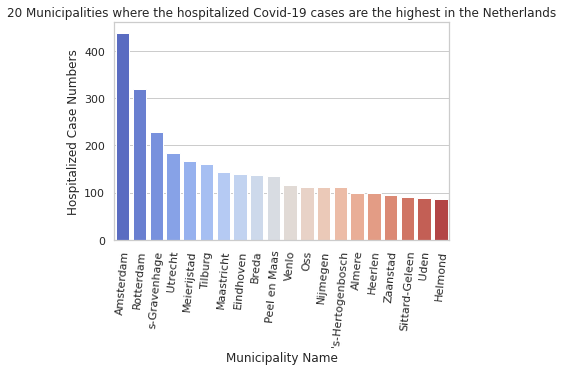

In [36]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x=df_maxs_h.Municipality, y=df_maxs_h.Hospitalized_Case_Number, data=df_maxs_h, palette='coolwarm')
ax.set(xlabel='Municipality Name', ylabel='Hospitalized Case Numbers', title='20 Municipalities where the hospitalized Covid-19 cases are the highest in the Netherlands')
plt.xticks(rotation=85)

In [37]:
df_max_p = df.People_tested_positive.max()
df_max_mun_p=df.Municipality[df.People_tested_positive == df_max_p]
print(f"The municipality where the number of people tested positive is the highest in the Netherlands is {df_max_mun_p.to_string(header=False, index=False)}")
print(f"The the number of people tested positive in {df_max_mun_p.to_string(header=False, index=False)} is {str(df_max_p)}.")

The municipality where the number of people tested positive is the highest in the Netherlands is  Rotterdam
The the number of people tested positive in  Rotterdam is 1374.


In [38]:
df_maxs_p=df.sort_values(ascending=False, by='People_tested_positive').head(20) #The municipalities where the case number is the highest in the NL.
df_maxs_p

,Municipality,People_tested_positive,Hospitalized_Case_Number,Death,Population,Province
252,Rotterdam,1374,319,93,651376,South Holland
16,Amsterdam,1305,439,102,872779,North Holland
255,s-Gravenhage,703,229,64,545163,South Holland
294,Utrecht,605,183,54,357694,Utrecht
285,Tilburg,518,160,110,219800,North Brabant
185,Maastricht,461,143,51,121558,Limburg
205,Nijmegen,426,111,38,177698,Gelderland
188,Meierijstad,413,166,102,81197,North Brabant
50,Breda,369,138,50,184271,North Brabant
228,Oss,351,112,67,91932,North Brabant


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

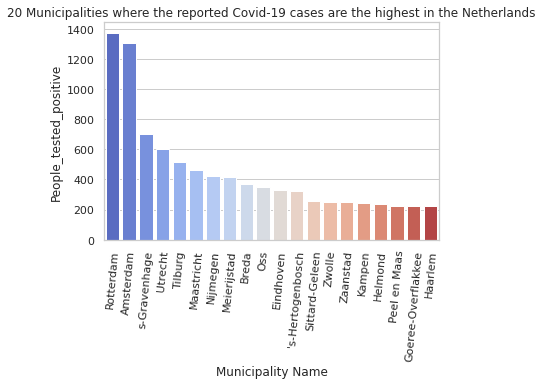

In [39]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x=df_maxs_p.Municipality, y=df_maxs_p.People_tested_positive, data=df_maxs_p, palette='coolwarm')
ax.set(xlabel='Municipality Name', ylabel='People_tested_positive', title='20 Municipalities where the reported Covid-19 cases are the highest in the Netherlands')
plt.xticks(rotation=85)

In [40]:
df.sort_values(by='Hospitalized_Case_Number').head(10) #The municipalities where the case number is the lowest in the NL.

,Municipality,People_tested_positive,Hospitalized_Case_Number,Death,Population,Province
259,Schiermonnikoog,0,0,0,947,Friesland
4,Achtkarspelen,7,0,0,27836,Friesland
280,Terschelling,2,0,0,4889,Friesland
308,Vlieland,0,0,0,1152,Friesland
180,Loppersum,2,0,0,9533,Groningen
13,Ameland,0,0,0,3718,Friesland
253,Rozendaal,2,1,0,1705,Gelderland
1,Aa en Hunze,11,1,0,25453,Drenthe
22,Baarle-Nassau,4,1,0,6860,North Brabant
121,Hardinxveld-Giessendam,26,1,2,18295,South Holland


In [41]:
df.sort_values(by='Population', ascending=False).head(10) # Listing by population

,Municipality,People_tested_positive,Hospitalized_Case_Number,Death,Population,Province
16,Amsterdam,1305,439,102,872779,North Holland
252,Rotterdam,1374,319,93,651376,South Holland
255,s-Gravenhage,703,229,64,545163,South Holland
294,Utrecht,605,183,54,357694,Utrecht
92,Eindhoven,327,140,50,234456,North Brabant
112,Groningen,141,16,2,232922,Groningen
285,Tilburg,518,160,110,219800,North Brabant
9,Almere,192,99,5,211840,Flevoland
50,Breda,369,138,50,184271,North Brabant
205,Nijmegen,426,111,38,177698,Gelderland


In [42]:
result = df.groupby(["Province"])['Hospitalized_Case_Number'].aggregate(np.sum).reset_index().sort_values('Hospitalized_Case_Number', ascending=False)
result

,Province,Hospitalized_Case_Number
6,North Brabant,2202
9,South Holland,1563
5,Limburg,1328
7,North Holland,1299
3,Gelderland,1068
10,Utrecht,687
8,Overijssel,485
1,Flevoland,208
11,Zeeland,126
2,Friesland,113


(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 6 Text major ticklabel objects>)

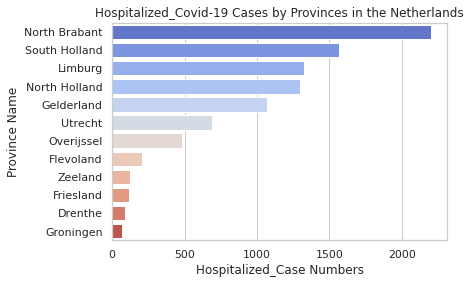

In [43]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(y=df.Province, x=df.Hospitalized_Case_Number, data=df, palette='coolwarm', estimator=sum, order=result['Province'], ci=None)
ax.set(ylabel='Province Name', xlabel='Hospitalized_Case Numbers', title='Hospitalized_Covid-19 Cases by Provinces in the Netherlands')
plt.xticks(rotation=0)

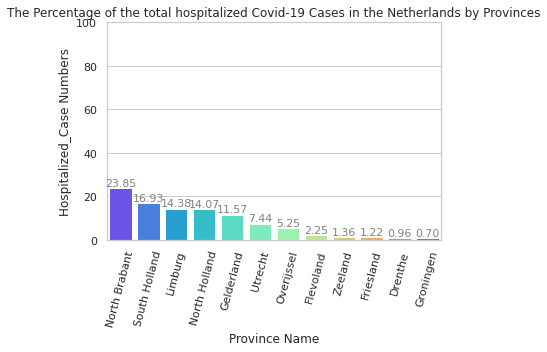

In [44]:
sns.set(style="whitegrid")

total = float(len(result))
g= sns.barplot(x=df.Province, y=df.Hospitalized_Case_Number, data=df, palette='rainbow', estimator=lambda y: sum(y) / sum(df.Hospitalized_Case_Number) * 100, order=result['Province'], ci=None)
g.set(xlabel='Province Name', ylabel='Hospitalized_Case Numbers', title='The Percentage of the total hospitalized Covid-19 Cases in the Netherlands by Provinces')
plt.xticks(rotation=75)
ax=g
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')
_ = g.set_ylim(0,100)

In [45]:
df_max_d = df.Death.max()
df_max_mun_d=df.Municipality[df.Death == df_max_d]
print(f"The municipality where the death from Covid-19 is the highest in the Netherlands is {df_max_mun_d.to_string(header=False, index=False)}")
print(f"The the number of death from Covid-19 in {df_max_mun_d.to_string(header=False, index=False)} is {str(df_max_d)}.")

The municipality where the death from Covid-19 is the highest in the Netherlands is  Tilburg
The the number of death from Covid-19 in  Tilburg is 110.


In [46]:
df_maxs_d=df.sort_values(ascending=False, by='Death').head(20) #The municipalities where the case number is the highest in the NL.
df_maxs_d

,Municipality,People_tested_positive,Hospitalized_Case_Number,Death,Population,Province
285,Tilburg,518,160,110,219800,North Brabant
16,Amsterdam,1305,439,102,872779,North Holland
188,Meierijstad,413,166,102,81197,North Brabant
252,Rotterdam,1374,319,93,651376,South Holland
228,Oss,351,112,67,91932,North Brabant
255,s-Gravenhage,703,229,64,545163,South Holland
234,Peel en Maas,227,136,55,43420,Limburg
294,Utrecht,605,183,54,357694,Utrecht
0,'s-Hertogenbosch,323,111,52,155113,North Brabant
185,Maastricht,461,143,51,121558,Limburg


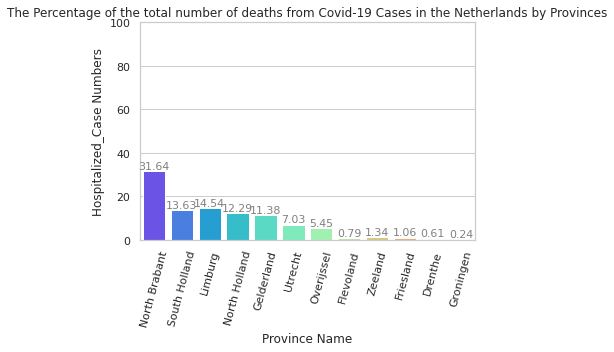

In [47]:
sns.set(style="whitegrid")

total = float(len(result))
g= sns.barplot(x=df.Province, y=df.Death, data=df, palette='rainbow', estimator=lambda y: sum(y) / sum(df.Death) * 100, order=result['Province'], ci=None)
g.set(xlabel='Province Name', ylabel='Hospitalized_Case Numbers', title='The Percentage of the total number of deaths from Covid-19 Cases in the Netherlands by Provinces')
plt.xticks(rotation=75)
ax=g
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')
_ = g.set_ylim(0,100)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

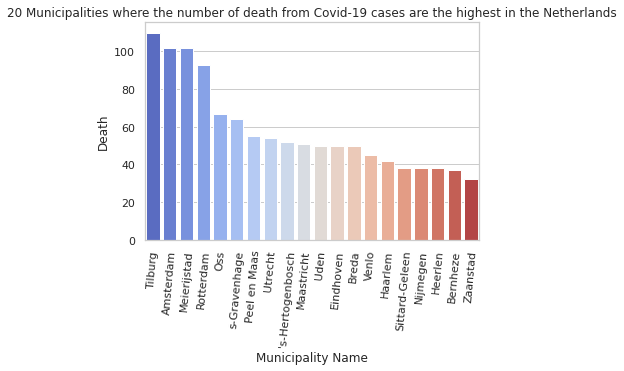

In [48]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x=df_maxs_d.Municipality, y=df_maxs_d.Death, data=df_maxs_d, palette='coolwarm')
ax.set(xlabel='Municipality Name', ylabel='Death', title='20 Municipalities where the number of death from Covid-19 cases are the highest in the Netherlands')
plt.xticks(rotation=85)

## PART 6 - INTERACTIVE MAP

In [0]:
!pip install -q geopandas

In [0]:
import json
import geopandas as gpd
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer

In [0]:
#Change the data type and column name to match the geojson file 
df.Municipality = df.Municipality.astype(str)
df.rename(index=str, columns={'Municipality': 'statnaam'}, inplace=True)

In [0]:
#Turn the GeoJson file into a data frame and merge it with df 
geodata_url = 'https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_gemeente_2017_gegeneraliseerd&outputFormat=json'
gdf = gpd.read_file(geodata_url)
merge = gdf.merge(df, how='left', on='statnaam')

In [0]:
#Turn the merged data frame back into a json file  
merged_json = json.loads(merge.to_json())
json_data = json.dumps(merged_json)

In [54]:
geosource = GeoJSONDataSource(geojson = json_data)
#set the color palette 
palette = brewer['Blues'][8]
palette = palette[::-1]
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 777,  nan_color = '#d9d9d9')
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color='black',location = (0,0), orientation ='horizontal')
#Set the size and title of the graph
p = figure(title = 'Cumulative Covid-19 Case Numbers in the Netherlands', 
           plot_height = 700 , plot_width = 700, toolbar_location = None, 
          tooltips=[
         ("Municipality", "@statnaam"),
         ("Hospitalized Case Number","@Hospitalized_Case_Number"),
         ("People tested positive","@People_tested_positive"),
         ("The Number of Deaths","@Death")])
#Makes it so there are no gird lines
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.patches('xs','ys', source = geosource,fill_color = {'field'     :'Hospitalized_Case_Number', 'transform' : color_mapper},         
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
p.add_layout(color_bar, 'below')
output_notebook()
show(p)

## PART 7  - FILTRATION BY MUNICIPALITIES

In [0]:
#Again renaming from statnaam to Municipality
df.rename(index=str, columns={'statnaam':'Municipality'}, inplace=True) 

In [0]:
#Cleaning the municipality names for any confusion or miswriting   
df.Municipality=df.Municipality.str.lower()
df.Municipality=df.Municipality.str.lstrip()
df.Municipality=df.Municipality.str.replace("-"," ")
df.Municipality=df.Municipality.str.replace("'","")
df.Municipality=df.Municipality.str.replace("ú","u")
df.Municipality=df.Municipality.str.replace("â","a")
df.Municipality=df.Municipality.str.replace(","," ")

In [0]:
#df.to_csv (r'C:\Users\dell\Desktop\NLP\dataset.csv',  index = True, header=True)

In [0]:
def matching():
    
    while True:
        
        #Elimination of confusion in the writing
        input_loc = input("Pls, Write your municipality?   ")  
        input_loc = input_loc.lower()
        if '-' in input_loc:
            input_loc = input_loc.replace("-"," ") 
        if "'" in input_loc:
            input_loc = input_loc.replace("'"," ")
        if 'ú'in input_loc:
            input_loc = input_loc.replace("ú","u")
        if "â" in input_loc:
            input_loc = input_loc.replace("â","a")
        if "," in input_loc:
            input_loc = input_loc.replace(","," ")
        input_loc = input_loc.lstrip()
        input_loc = " ".join(input_loc.split())

        
        #Matching including exceptions
        if input_loc == 'den bosch':
            search1=df.Hospitalized_Case_Number[df.Municipality=="s hertogenbosch"]
            search2=df.People_tested_positive[df.Municipality=="s hertogenbosch"]
            search3=df.Death[df.Municipality=="s hertogenbosch"]
            time.sleep(1)
            print(f"The latest hospitalized case number in {input_loc.title()} is  {search1.to_string(header=False, index=False)}")
            print(f"The latest number of people tested positive in {input_loc.title()} is  {search2.to_string(header=False, index=False)}")
            print(f"The latest number of deaths in {input_loc.title()} is  {search3.to_string(header=False, index=False)}")   
        
        elif input_loc == 'den haag':
            search1=df.Hospitalized_Case_Number[df.Municipality=="s gravenhage"]
            search2=df.People_tested_positive[df.Municipality=="s gravenhage"]
            search3=df.Death[df.Municipality=="s gravenhage"]
            time.sleep(1)
            print(f"The latest hospitalized case number in {input_loc.title()} is  {search1.to_string(header=False, index=False)}")
            print(f"The latest number of people tested positive in {input_loc.title()} is  {search2.to_string(header=False, index=False)}")
            print(f"The latest number of deaths in {input_loc.title()} is  {search3.to_string(header=False, index=False)}")  

        elif input_loc == 'bergen':
            bergen_input = input('For Bergen Limburg, please write Limburg, for Bergen Noord Holland, please write Noord Holland:    ')
            bergen_input=bergen_input.lower()
            bergen_input=bergen_input.lstrip()
            bergen_input = " ".join(bergen_input.split())

            if bergen_input=="limburg":
                search1=df.Hospitalized_Case_Number[df.Municipality=="limburg"]
                search2=df.People_tested_positive[df.Municipality=="limburg"]
                search3=df.Death[df.Municipality=="limburg"]
                time.sleep(1)
                print(f"The latest hospitalized case number in {input_loc.title()} is  {search1.to_string(header=False, index=False)}")
                print(f"The latest number of people tested positive in {input_loc.title()} is  {search2.to_string(header=False, index=False)}")
                print(f"The latest number of deaths in {input_loc.title()} is  {search3.to_string(header=False, index=False)}")  
        
            elif bergen_input=='noord holland':
                search1=df.Hospitalized_Case_Number[df.Municipality=="noord holland"]
                search2=df.People_tested_positive[df.Municipality=="noord holland"]
                search3=df.Death[df.Municipality=="noord holland"]
                time.sleep(1)
                print(f"The latest hospitalized case number in {input_loc.title()} is  {search1.to_string(header=False, index=False)}")
                print(f"The latest number of people tested positive in {input_loc.title()} is  {search2.to_string(header=False, index=False)}")
                print(f"The latest number of deaths in {input_loc.title()} is  {search3.to_string(header=False, index=False)}")  
        
            else:
                print('Not matched')
                time.sleep(1)
                matching()
        
        else:
            search1=df.Hospitalized_Case_Number[df.Municipality==input_loc]
            search2=df.People_tested_positive[df.Municipality==input_loc]
            search3=df.Death[df.Municipality==input_loc]
            time.sleep(1)
            print(f"The latest hospitalized case number in {input_loc.title()} is  {search1.to_string(header=False, index=False)}")
            print(f"The latest number of people tested positive in {input_loc.title()} is  {search2.to_string(header=False, index=False)}")
            print(f"The latest number of deaths in {input_loc.title()} is  {search3.to_string(header=False, index=False)}")  
        
        
matching()